<a href="https://colab.research.google.com/github/abhiram27/DIP/blob/main/DIP_Question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

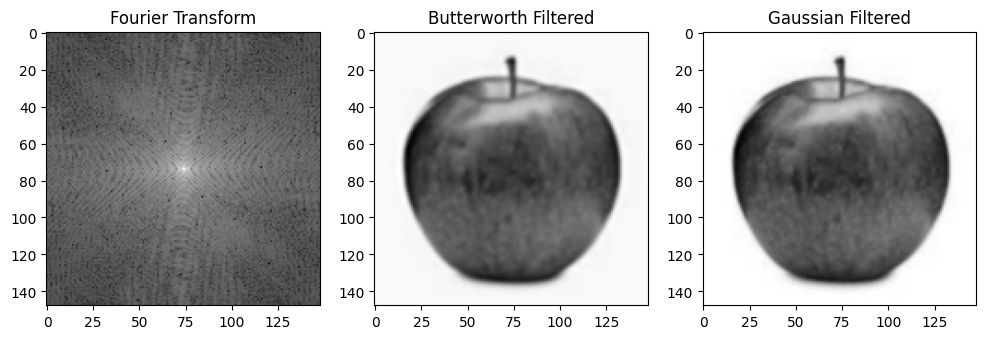

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image and apply Fourier Transform
image = cv2.imread('apple.png', 0)

# Check if the image is loaded
if image is None:
    raise ValueError("Image not found or unable to load.")

f_transform = np.fft.fftshift(np.fft.fft2(image))

# Butterworth Low-pass Filter
def butterworth_lowpass_filter(shape, d0, n):
    P, Q = shape
    H = np.zeros((P, Q), dtype=np.float32)
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - P/2)**2 + (v - Q/2)**2)  # Corrected distance calculation
            H[u, v] = 1 / (1 + (D/d0)**(2*n))
    return H

butter_filter = butterworth_lowpass_filter(image.shape, 30, 2)
butter_filtered = f_transform * butter_filter

# Inverse Fourier Transform
butter_filtered_img = np.fft.ifft2(np.fft.ifftshift(butter_filtered))
butter_filtered_img = np.abs(butter_filtered_img)

# Gaussian Filter
x = cv2.getGaussianKernel(image.shape[0], 30)
y = cv2.getGaussianKernel(image.shape[1], 30)
gaussian_filter = x * y.T

gaussian_filtered = f_transform * gaussian_filter

# Inverse Fourier Transform
gaussian_filtered_img = np.fft.ifft2(np.fft.ifftshift(gaussian_filtered))
gaussian_filtered_img = np.abs(gaussian_filtered_img)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(np.log(np.abs(f_transform) + 1), cmap='gray'), plt.title('Fourier Transform')
plt.subplot(132), plt.imshow(butter_filtered_img, cmap='gray'), plt.title('Butterworth Filtered')
plt.subplot(133), plt.imshow(gaussian_filtered_img, cmap='gray'), plt.title('Gaussian Filtered')
plt.show()
